<a href="https://colab.research.google.com/github/Sauravhuskie/680---assignment-2/blob/main/CSCI_680_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#REFERENCES

1) https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

2) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

3) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

4) https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

5) https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html


#Question 1: Generate “X_aniso” dataset using the following code. 

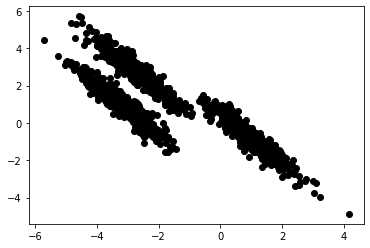

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
n_samples = 1500
random_state = 170
X,y = datasets.make_blobs(n_samples = n_samples, random_state = random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
plt.plot(X_aniso[:,0], X_aniso[:,1], 'o', color = 'black')
plt.show()

#Question 2: Train KMeans, Agglomerative, DBSCAN and GMM clustering algorithm on X_aniso. Visualize their clusters in different colors results. and write a short paragraph to compare their results.

### K-means clustering - 3 clusters

In [ ]:
from sklearn.datasets import make_blobs
################################################CREATING MODELS ##########################################

############################################################
#Kmeans Clustering model for 1,2,3, and 4 clusters

from sklearn.cluster import KMeans
km1 = KMeans(n_clusters=1, random_state=0)
km2 = KMeans(n_clusters=2, random_state=0)
km3= KMeans(n_clusters=3, random_state=0)
km4 = KMeans(n_clusters=4, random_state=0)

################################################################
#fitting the cluster
km1.fit(X_aniso)
km2.fit(X_aniso)
km3.fit(X_aniso)
km4.fit(X_aniso)

############################################################
#Agglomarative Clustering model for 1,2,3 and 4 clusters
from sklearn.cluster import AgglomerativeClustering
AC1= AgglomerativeClustering(n_clusters=1, linkage='ward').fit(X_aniso)
AC2= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X_aniso)
AC3= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_aniso)
AC4= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X_aniso)

#################
#Agglomarative Clustering model for 3 clusters but different linkages
AC5= AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_aniso)
AC6= AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X_aniso)
AC7= AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_aniso)
AC8= AgglomerativeClustering(n_clusters=3, linkage= 'single').fit(X_aniso)

############################################################
# DBSCAN clustering
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X_aniso)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

############################################################
#Gaussian Mixture model for 1,2,3 and 4 clusters
from sklearn.mixture import GaussianMixture
gmm1 = GaussianMixture(n_components= 1)
gmm2 = GaussianMixture(n_components=2)
gmm3 = GaussianMixture(n_components= 3)
gmm4 = GaussianMixture(n_components=4)
gmm1.fit(X_aniso)
gmm2.fit(X_aniso)
gmm3.fit(X_aniso)
gmm4.fit(X_aniso)


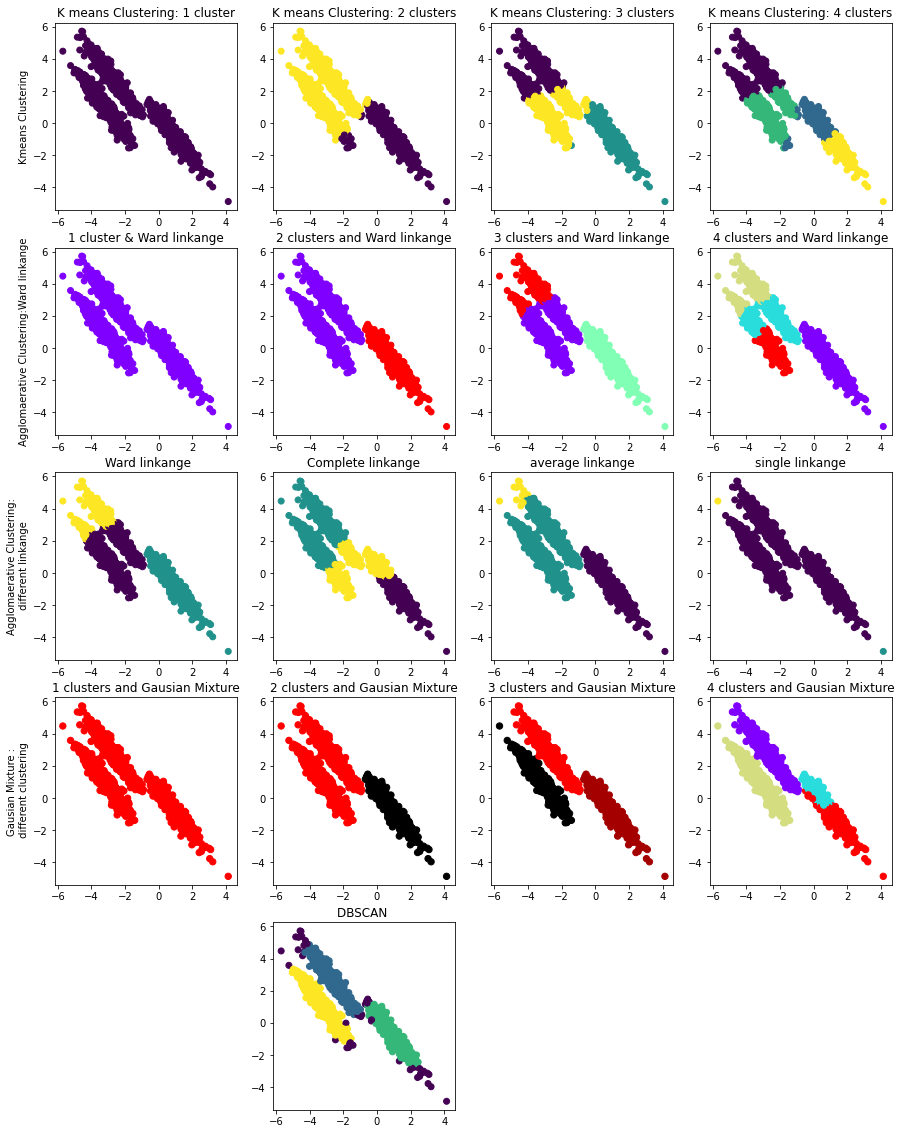

In [88]:
################################################ Creating Scatterplots ##########################################
fig, axes = plt.subplots(5, 4, figsize=(15,20)) #creating subplots

####plotting KMeans Clustering#####################
axes[0,0].set_ylabel('Kmeans Clustering')
axes[0,0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=km1.labels_)
axes[0,0].set_title('K means Clustering: 1 cluster')
axes[0,1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=km2.labels_)
axes[0,1].set_title('K means Clustering: 2 clusters')
axes[0,2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=km3.labels_)
axes[0,2].set_title('K means Clustering: 3 clusters')
axes[0,3].scatter(X_aniso[:, 0], X_aniso[:, 1], c=km4.labels_)
axes[0,3].set_title('K means Clustering: 4 clusters')

####plotting Agglomarative Clustering with different cluster size#####################
axes[1,0].set_ylabel('Agglomaerative Clustering:Ward linkange')
axes[1,0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC1.labels_, cmap='rainbow')
axes[1,0].set_title('\n1 cluster & Ward linkange')
axes[1,1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC2.labels_, cmap='rainbow')
axes[1,1].set_title('2 clusters and Ward linkange' )
axes[1,2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC3.labels_, cmap='rainbow')
axes[1,2].set_title('3 clusters and Ward linkange')
axes[1,3].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC4.labels_,cmap='rainbow')
axes[1,3].set_title('4 clusters and Ward linkange')


####plotting Agglomarative Clustering with different linkage#####################
axes[2,0].set_ylabel('Agglomaerative Clustering:\n different linkange')
axes[2,0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC5.labels_, cmap='viridis')
axes[2,0].set_title(' Ward linkange')
axes[2,1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC6.labels_, cmap='viridis')
axes[2,1].set_title('Complete linkange' )
axes[2,2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC7.labels_, cmap='viridis')
axes[2,2].set_title('average linkange')
axes[2,3].scatter(X_aniso[:, 0], X_aniso[:, 1], c=AC8.labels_,cmap='viridis')
axes[2,3].set_title('single linkange')

####plotting Gaussian Mixture Model#####################
axes[3,0].set_ylabel('Gausian Mixture :\n different clustering')
axes[3,0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm1.predict(X_aniso), s=40, cmap='flag')
axes[3,1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm2.predict(X_aniso), s=40, cmap='flag');
axes[3,2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm3.predict(X_aniso), s=40, cmap='flag')
axes[3,3].scatter(X_aniso[:, 0], X_aniso[:, 1], c=gmm4.predict(X_aniso), s=40, cmap='rainbow');
axes[3,0].set_title('1 clusters and Gausian Mixture')
axes[3,1].set_title('2 clusters and Gausian Mixture')
axes[3,2].set_title('3 clusters and Gausian Mixture')
axes[3,3].set_title('4 clusters and Gausian Mixture')

####plotting DBSCAN Model#####################
axes[4,1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=db.labels_)
axes[4,1].set_title("DBSCAN ")
axes[4,0].set_visible(False)
axes[4,2].set_visible(False)
axes[4,3].set_visible(False)

plt.show()

##Write a short paragraph to compare their results.

---
There are 3 clusters and 2 outliers in the X_aniso dataset. This assignment experimented with 4 K-means clustering with different sizes of clusters (1, 2, 3, and 4). None of them could predict 3 clusters clearly.  Similarly, 1, 2, 3, and 4 cluster size was also used for the Agglomerate Clustering algorithm. Only 2 cluster was able to identify clusters. Agglomerate clustering has four linkages: ward, complete, average, and single linkage. None of them was able to identify 3 clusters clearly. Therefore, they make no significant outcome in this visualization. Gaussian Mixture is also used for 1,2,3 and 4 clusters. Gaussian Mixture was accurate in clustering 1, 2,3, and 4 clusters. DBSCAN has an automatic number of cluster generators. This data generated three groups but could not identify clusters.
\
**In conclusion, Gaussian Mixture is the best method to identify clusters(2,3,4). Agglomerate clustering with Ward cluster linkage can predict up to 2 clusters well. On the other hand, DBSCAN and K-means clustering does not do good for any number of clusters to cluster.**

---



---

